# **COMP 2211 Exploring Artificial Intelligence** #
## Lab 2 Naive Bayes Classifier ##


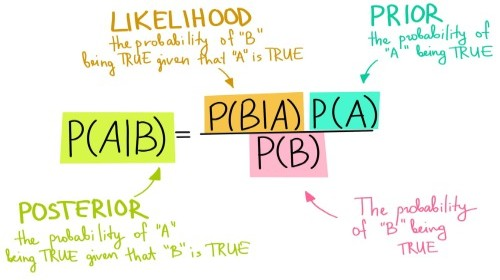

## Before We Begin ##

Run the code in the following two code cells to "mount" the Google drive directory.

## Mount Google Drive
Download and save a copy of the Lab2 Notebook and Excel files (*heart_disease_train_dataset.csv*, *heart_disease_test_dataset.csv*) to your Google Drive, ensuring that all three files are in the same location.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Modify the pathway of the *%cd* shell command according to the location in your Google Drive where you have saved the Notebook and Excel files. Double check the output of the *%ls* shell command to ensure that you are in the correct working directory; it should display the filenames of *lab2.ipynb*, *heart_disease_train_dataset.csv*, and *heart_disease_test_dataset.csv*.

In [2]:
%cd "/content/drive/My Drive/Lab2"
%ls

/content/drive/My Drive/Lab2
heart_disease_test_dataset.csv   lab2.ipynb
heart_disease_train_dataset.csv  lab2_sol.ipynb


# Dataset Description
*heart_disease_train_dataset.csv* contains 250 training samples, consisting of 6 features (resting_blood_pressure, serum_cholesterol, diabetes, left_ventricular_hypertrophy, ST_slope_anomaly, myocardial_defect) and 1 target label (heart_disease). The first row is the header row containing the column names, for a total of 251 rows and 7 columns.

Below is the list of column names, their possible values, and the information that they represent:

Column Name                            | Variable Type | Remarks 
---------------------------------------|---------------|--------
resting_blood_pressure                 | Categorical   | 0 = normal ; 1 = elevated ; 2 = hypertension
serum_cholesterol                      | Categorical   | 0 = normal ; 1 = mild-risk ; 2 = high-risk
diabetes                               | Binary        | 0 = no ; 1 = yes
left_ventricular_hypertrophy           | Binary        | 0 = no ; 1 = yes
ST_slope_anomaly                       | Binary        | 0 = no ; 1 = yes
myocardial_defect                      | Binary        | 0 = no ; 1 = yes
heart_disease                          | Binary        | 0 = no ; 1 = yes

\
*heart_disease_test_dataset.csv* contains 50 test samples, consisting of the same 6 features (resting_blood_pressure, serum_cholesterol, diabetes, left_ventricular_hypertrophy, ST_slope_anomaly, myocardial_defect) and 1 target label (heart_disease). The first row is also the header row containing the column names, for a total of 51 rows and 7 columns. Your task is to predict the 50 target labels with *Naive Bayes Classifier*, with conditional probabilities calculated from the 250 training samples, and then check your accuracy against the actual target labels.


## Load Datasets
Load the train and test datasets from Google Drive into NumPy using *loadtxt()*.
To read *.csv* files, we specify comma as the delimiter, and also skip the header row.

In [3]:
import numpy as np
# delimiter: The string used to separate values. As ',' is used as delimiter in csv, we specify delimiter as ','
# skiprows: Skip the first skiprows lines; default: 0. As we want to skip the header row, we specify skiprows as 1 
train = np.loadtxt("heart_disease_train_dataset.csv", delimiter=',', skiprows=1)
test = np.loadtxt("heart_disease_test_dataset.csv", delimiter=',', skiprows=1)

# Naive Bayes Classifier

## Task 1: Relative Frequencies
First of all, calculative the relative frequencies of each feature given the target label (Likelihoods, i.e. $P(feature|label)$), as well as the frequencies of each target label (Prior Probability, i.e. $P(label)$). Since our goal is only Classification, we don't need to worry about the denominator (Marginal Probability). 

Optional: Fill-in the table below to help keep track of our calculations.

|               | Resting Blood Pressure |     |    | / | Serum Cholesterol |     |    | / | Diabetes |     |    | / | Left Ventricular Hypertrophy |     |    | / | ST Slope Anomaly |     |    | / | Myocardial Defect |     |    | / | Heart Disease |     |    |
|---------------|------------------------|-----|----|---|-------------------|-----|----|---|----------|-----|----|---|------------------------------|-----|----|---|------------------|-----|----|---|-------------------|-----|----|---|---------------|-----|----|
| Heart Disease |                        | Yes | No | / |                   | Yes | No | / |          | Yes | No | / |                              | Yes | No | / |                  | Yes | No | / |                   | Yes | No | / |               | Yes | No |
|               | Hypertension           |     |    | / | High-Risk         |     |    | / | Yes      |     |    | / | Yes                          |     |    | / | Yes              |     |    | / | Yes               |     |    | / | -             |     |    |
|               | Elevated               |     |    | / | Mild-Risk         |     |    | / | No       |     |    | / | No                           |     |    | / | No               |     |    | / | No                |     |    | / | -             | -   | -  |
|               | Normal                 |     |    | / | Normal            |     |    | / | -        | -   | -  | / | -                            | -   | -  | / | -                | -   | -  | / | -                 | -   | -  | / | -             | -   | -  |


In [ ]:
# The given code below calculates the Prior Probabilities of Heart Disease.
# Modify the code to also calculate the Likelihoods for all the remaining features.

train_features = train[:, :-1] # All except the last column.
train_labels = train[:, -1]    # Only the last column.

num_heart_disease_yes = 0 # Count of heart_disease = yes
num_heart_disease_no = 0  # Count of heart_disease = no
#TODO

for row in range(train_features.shape[0]):
  if train_labels[row] == 1:
    num_heart_disease_yes += 1
    # TODO

  else:
    num_heart_disease_no += 1
    # TODO

heart_disease_yes = num_heart_disease_yes/train.shape[0] # P(heart_disease = yes)
heart_disease_no = num_heart_disease_no/train.shape[0]   # P(heart_disease = no)
#TODO

## Task 2: Prediction
Now that we have the Prior Probabilities of Heart Disease and the Likelihoods of each feature, the next step is to use *Naive Bayes Classifer* to predict the target labels of *heart_disease_test_dataset.csv*.
To avoid floating-point underflow, we will use the **sum-of-log-probabilities** version of the *Naive Bayes* formula - the predicted label has the highest sum-of-log-probabilities score.

$B_{NB} = argmax_{B_i}(logP(B_{i}) + ∑_{n=1}^d logP(e_n|B_i))$

Note: It doesn't matter which log base we use because of the change-of-base formula: $log_ax = \frac{log_bx}{log_ba}$

In [ ]:
# The given code below sums the log-prior-probability of Heart Disease.
# Modify the code to also sum the log-likelihoods for all the remaining features, according to the specific test case.

test_features = test[:, :-1] # All except the last column.
test_labels = test[:, -1]    # Only the last column.
predict_labels = np.zeros_like(test_labels)       # Create a numpy array of zeros with the same shape as test_labels. 

log_heart_disease_yes = np.log(heart_disease_yes) # log_e of P(heart_disease = yes)
log_heart_disease_no = np.log(heart_disease_no)   # log_e of P(heart_disease = no)
#TODO

for row in range(test_features.shape[0]):
  predict_yes = log_heart_disease_yes # log_e of P(heart_disease = yes)
  predict_no = log_heart_disease_no   # log_e of P(heart_disease = no)
  #TODO

## Test Accuracy
Now we compare our predictions versus the actual target labels of *heart_disease_test_dataset.csv*. At the very least, we should achieve significantly higher than 50% accuracy, which is the baseline for guessing all 0s or all 1s. 

In [ ]:
num_match = 0
for i in range(predict_labels.shape[0]):
  if predict_labels[i] == test_labels[i]:
    num_match += 1
accuracy_score = num_match/predict_labels.shape[0]

print(accuracy_score)
print(predict_labels)
print(test_labels)

# Unmount Google Drive

In [ ]:
drive.flush_and_unmount()